# MGL EFIS Plotter

Start by importing the MglEfisPlotter code.

working through http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [ ]:
# Either update your PYTHONPATH to include your project directory or uncomment the next two lines
# import sys
# sys.path.append('..')

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MglEfisPlotter import *

Load some flights from the sample `IEFISBB.DAT` file.

In [5]:
datafile = '../data/IEFISBB.DAT'
minTimestamp = 429600874
maxTimestamp = 1000000000

flights = createFlights(datafile, minTimestamp, maxTimestamp)
f = flights[-1]
print(f)

Flight at 2019-02-13 14:14:21-14:29:57,  3903 messages, 479912852-479913848


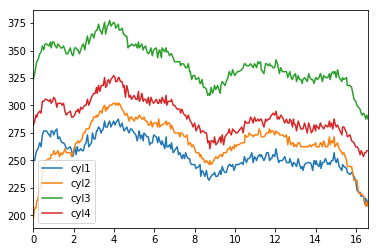

In [21]:
data = f.getData('cht')
df = pd.DataFrame(data.values(), index=data.keys(), columns=('cyl1', 'cyl2', 'cyl3', 'cyl4'))
df.plot()

In [9]:
df.describe()

,cyl1,cyl2,cyl3,cyl4
count,247.000000,247.000000,247.000000,247.000000
mean,255.863158,266.765182,338.225911,290.799190
std,15.919305,20.319471,18.889408,16.413533
min,208.400000,197.600000,287.600000,253.400000
25%,246.200000,257.000000,325.400000,279.500000
50%,253.400000,266.000000,336.200000,287.600000
75%,267.800000,279.500000,352.400000,303.800000
max,287.600000,302.000000,377.600000,327.200000


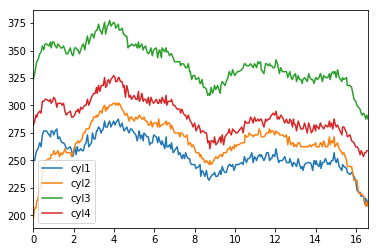

In [13]:
df.columns
df.plot()

In [15]:
seconds = f.listData('cht')['seconds']
print('seconds=', len(seconds))

cht = f.listData('cht')['data']
print('cht=', len(cht))

egt = f.listData('egt')['data']
print('egt=', len(egt))

rpm = f.listData('rpm')['data']
print('rpm=', len(rpm))



df2 = pd.DataFrame({
    'seconds': seconds,
    'cht': cht,
    'egt': egt,
    'rpm': rpm,
})
df2.head()

seconds= 559
cht= 559
egt= 559
rpm= 559


,seconds,cht,egt,rpm
0,0.000000,"[249.8, 197.6, 323.6, 282.2]","[1158.8, 1180.4, 1283.0, 1164.2]",2890
1,0.000000,"[249.8, 197.6, 323.6, 282.2]","[1158.8, 1180.4, 1283.0, 1164.2]",2890
2,0.066667,"[258.8, 201.2, 332.6, 289.4]","[1193.0, 1203.8, 1313.6, 1180.4]",2932
3,0.066667,"[249.8, 206.6, 329.0, 285.8]","[1207.4, 1207.4, 1322.6, 1185.8]",2950
4,0.066667,"[258.8, 201.2, 332.6, 289.4]","[1193.0, 1203.8, 1313.6, 1180.4]",2932


In [8]:
df2.columns

Index(['seconds', 'cht', 'egt', 'rpm'], dtype='object')

In [26]:
rpmData = f.listData('rpm')
rpm = pd.DataFrame(rpmData)
rpm.head()

,seconds,data
0,0.000000,2890
1,0.000000,2890
2,0.066667,2932
3,0.066667,2950
4,0.066667,2932


In [29]:
paltData = f.listData('pAltitude')
palt = pd.DataFrame(paltData)
palt.head()

,seconds,data
0,0.000000,405
1,0.000000,405
2,0.066667,430
3,0.066667,454
4,0.066667,454


In [30]:
palt.merge(rpm, left_on='seconds', right_on='seconds', suffixes=('_alt', '_rpm'))

,seconds,data_alt,data_rpm
0,0.000000,405,2890
1,0.000000,405,2890
2,0.000000,405,2890
3,0.000000,405,2890
4,0.066667,430,2932
5,0.066667,430,2950
6,0.066667,430,2932
7,0.066667,430,2950
8,0.066667,454,2932
9,0.066667,454,2950
